In [1]:
import pandas as pd

## Reading Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
0,100.997154,0,14,0,-1,1
1,99.823715,1,96,1,1,1
2,99.373770,0,71,1,-1,1
3,101.113286,0,77,0,1,1
4,103.247795,0,1,0,0,1
...,...,...,...,...,...,...
2994,104.694157,1,28,1,1,0
2995,100.813707,0,60,0,-1,0
2996,102.852352,1,16,0,-1,1
2997,101.528762,1,78,1,-1,1


In [4]:
data.head()

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
0,100.997154,0,14,0,-1,1
1,99.823715,1,96,1,1,1
2,99.373770,0,71,1,-1,1
3,101.113286,0,77,0,1,1
4,103.247795,0,1,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          2999 non-null   float64
 1   bodyPain       2999 non-null   int64  
 2   age            2999 non-null   int64  
 3   runnyNose      2999 non-null   int64  
 4   diffBreathe    2999 non-null   int64  
 5   infectionProb  2999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 140.6 KB


In [6]:
data.isnull().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreathe      0
infectionProb    0
dtype: int64

In [7]:
data.bodyPain.value_counts()

0    1543
1    1456
Name: bodyPain, dtype: int64

In [8]:
data.diffBreathe.value_counts()

 0    1034
-1     987
 1     978
Name: diffBreathe, dtype: int64

In [9]:
data.describe()

,fever,bodyPain,age,runnyNose,diffBreathe,infectionProb
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,101.476129,0.485495,51.360120,0.494832,-0.003001,0.496499
std,2.047255,0.499873,28.527897,0.500057,0.809585,0.500071
min,98.008745,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.693009,0.000000,27.000000,0.000000,-1.000000,0.000000
50%,101.356294,0.000000,51.000000,0.000000,0.000000,0.000000
75%,103.247520,1.000000,76.000000,1.000000,1.000000,1.000000
max,104.997029,1.000000,100.000000,1.000000,1.000000,1.000000


In [10]:
import numpy as np

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='age', ylabel='count'>

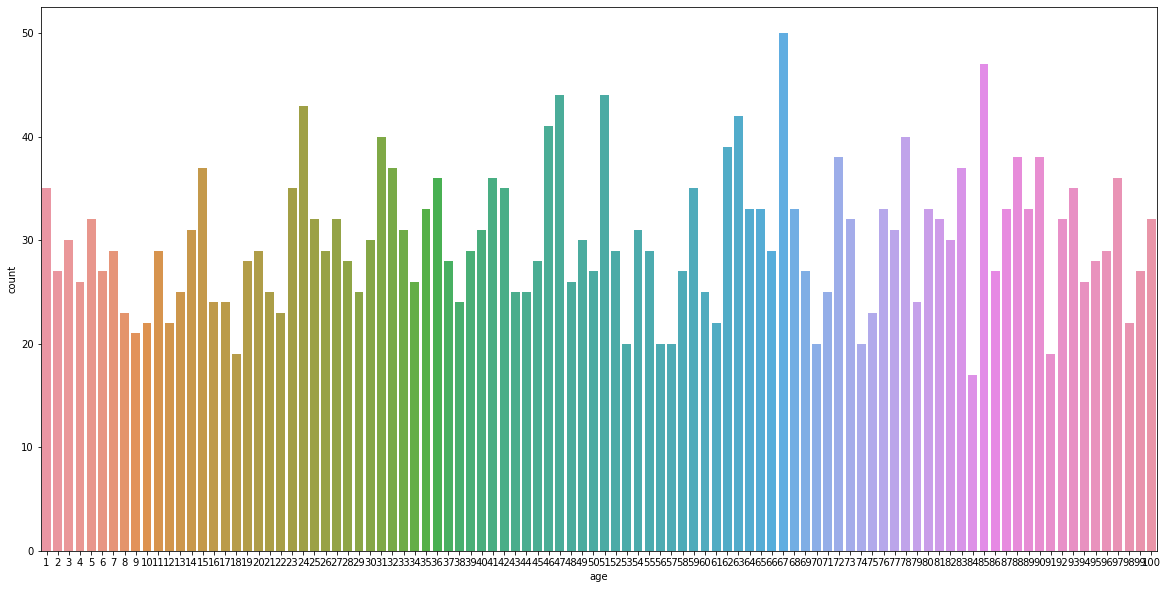

In [12]:
plt.figure(figsize=[20,10])
sns.countplot(data.age)

<AxesSubplot:xlabel='bodyPain', ylabel='infectionProb'>

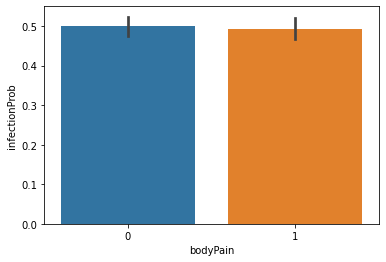

In [13]:
sns.barplot(x='bodyPain',y='infectionProb',data=data)

<AxesSubplot:xlabel='diffBreathe', ylabel='infectionProb'>

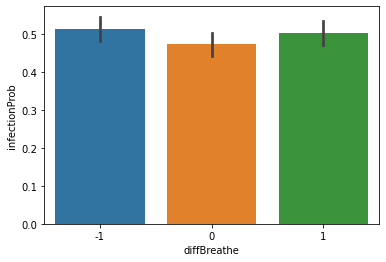

In [14]:
sns.barplot(x='diffBreathe',y='infectionProb',data=data)

## Train Test Splitting

In [15]:
X = data.drop('infectionProb',axis=1)

In [16]:
X

,fever,bodyPain,age,runnyNose,diffBreathe
0,100.997154,0,14,0,-1
1,99.823715,1,96,1,1
2,99.373770,0,71,1,-1
3,101.113286,0,77,0,1
4,103.247795,0,1,0,0
...,...,...,...,...,...
2994,104.694157,1,28,1,1
2995,100.813707,0,60,0,-1
2996,102.852352,1,16,0,-1
2997,101.528762,1,78,1,-1


In [17]:
y = data['infectionProb']

In [18]:
y.shape

(2999,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [21]:
X_train.shape

(2399, 5)

In [22]:
X_test.shape

(600, 5)

In [23]:
y_train.shape

(2399,)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
infection=clf.predict([[98,0,18,0,0]])

In [28]:
infection_probability= clf.predict_proba([[98,0,18,0,1]])

In [29]:
infection

array([0], dtype=int64)

In [30]:
infection_probability

array([[0.53380404, 0.46619596]])